In [1]:
import sys
import os
import random
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
from numpy import cos, sin
import astropy.coordinates as coord
import astropy.units as u
from math import *
from time import time
from astropy.io import ascii
from astropy.table import Table, Column 
import pyfits
import pylab as py
from itertools import chain
from astropy import coordinates as coord
from astropy import units as unit
from matplotlib import  lines
from matplotlib import rc, rcParams
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Polygon, Ellipse
import numpy as np
from math import *
from time import time
import wl_to_rgb as col
import random
from astropy.io import ascii
from astropy.table import Table, Column 
import pyfits
import pylab as py

from astropy import coordinates as coord
from astropy import units as unit

import matplotlib.colors as colors
import matplotlib.cm as cmx

import matplotlib.patches as mpatches

from kapteyn import wcs
from matplotlib import *

from pylab import *


In [2]:
################################################################ 
def xymap_aitoff(x,y):
  
  while x > 360:
    x-=360
  while x < 0:
    x+=360
    
  x0 = (180.-x)*pi/180.
  y0 = y*pi/180.
  
  return x0, y0
################################################################   
## Adding Pan-STARRS dec > -30 deg border 
def add_psborder(ax, color='black', plane=None, projection=None):
    
  if plane==None or projection==None:
    return
  
  alpha = np.arange(0.,360,2)
  delta = alpha*0.-30.   

  #tran = wcs.Transformation(plane + " j2000 j2000", projection)
  #alpha, delta = tran((alpha,delta))
  
  for i in range(len(alpha)):
    if alpha[i] >180:
      alpha[i] -= 360.
  
  ind = np.argsort(alpha)
  alpha = alpha[ind]
  delta = delta[ind]
  
  X = []
  Y = [] 
  
  for i in range(len(alpha)/2):
      x, y = xymap_aitoff(alpha[i], delta[i])
      X.append(x)
      Y.append(y)
      
  ax.plot(X, Y, '-', color=color,linewidth=3)   
  X = []
  Y = []    
  for i in range(len(alpha)/2, len(alpha)):
      x, y = xymap_aitoff(alpha[i], delta[i])
      X.append(x)
      Y.append(y)     
  ax.plot(X, Y, '-', color=color,linewidth=3)   

#################################################################

def add_plane(ax, color='black', plane=None, projection=None):
  
  if plane==None or projection==None:
    return
  
  alpha = np.arange(0.,360,2)
  delta = alpha*0.
  
  tran = wcs.Transformation(plane + " j2000 j2000", projection)
  alpha, delta = tran((alpha,delta))
  
  for i in range(len(alpha)):
    if alpha[i] >180:
      alpha[i] -= 360.
  
  ind = np.argsort(alpha)
  alpha = alpha[ind]
  delta = delta[ind]
  
  X = []
  Y = [] 
  
  for i in range(len(alpha)/2):
      x, y = xymap_aitoff(alpha[i], delta[i])
      X.append(x)
      Y.append(y)
      
  ax.plot(X, Y, '-', color=color)   
  X = []
  Y = []    
  for i in range(len(alpha)/2, len(alpha)):
      x, y = xymap_aitoff(alpha[i], delta[i])
      X.append(x)
      Y.append(y)     
  ax.plot(X, Y, '-', color=color)   

  
  
  
##########################################################################   

In [3]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', filling_values=-1, names=True, dtype=None, encoding=None)
CF4_pgc = table['pgc'] 

inFile = '../EDD_distance_cf4_v27.csv'
table  = np.genfromtxt(inFile , delimiter='|', filling_values=-1, names=True, dtype=None)
pgc  = table['pgc']
ra   = table['ra']
dec  = table['dec']
sgl  = table['sgl']
sgb  = table['sgb']

Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [4]:
_, _, indx = np.intersect1d(CF4_pgc, pgc, return_indices=True)

pgc  = pgc[indx]
ra   = ra[indx]
dec  = dec[indx]
Sqlt = Sqlt[indx]
Wqlt = Wqlt[indx]
sgl = sgl[indx]
sgb = sgb[indx]

j2000
j2000
j2000
j2000
j2000
j2000
j2000
j2000


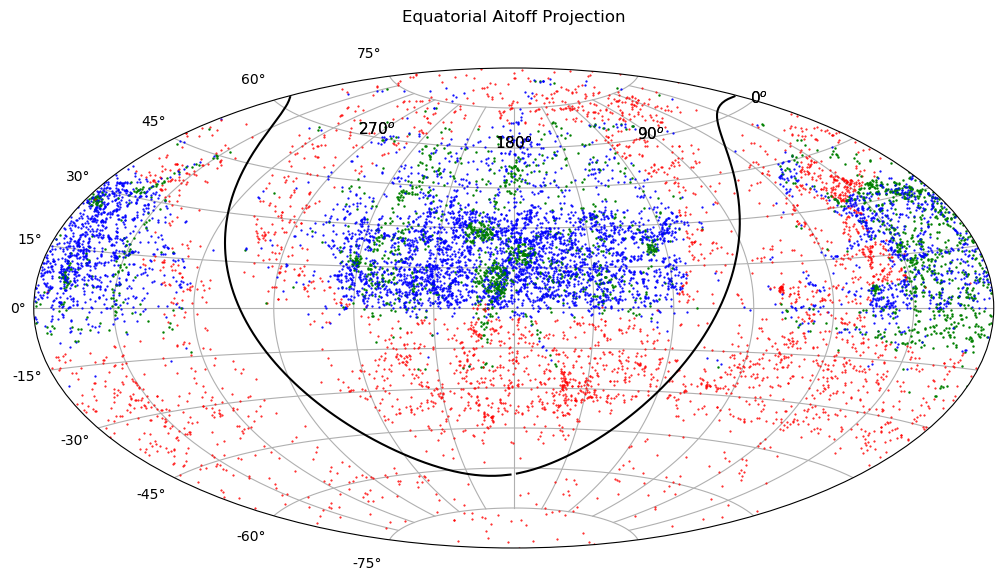

In [5]:
fig = plt.figure(figsize=(13, 8), dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
plt.title("Equatorial Aitoff Projection", y=1.08)
ax.grid(True)
ax.set_xticklabels([])
plt.subplots_adjust(top=0.90, bottom=0.3, right=0.95, left=0.05)

ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black')


ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black') 

X_S  = []
Y_S  = [] 

X_W  = []
Y_W  = [] 

X_SW  = []
Y_SW  = [] 

for i in range(len(pgc)):
    
    x, y = xymap_aitoff(ra[i], dec[i])
    
    if Sqlt[i]>0 and Wqlt[i]==0:
        X_S.append(x)
        Y_S.append(y) 
        ax.plot(x, y, '.', color='b', mec='b', ms=1.2)
    elif Sqlt[i]==0 and Wqlt[i]>0:
        X_W.append(x)
        Y_W.append(y)
        ax.plot(x, y, '.', color='r', mec='r', ms=1)
    elif Sqlt[i]>0 and Wqlt[i]>0:
        X_SW.append(x)
        Y_SW.append(y)  
        ax.plot(x, y, '.', color='g', mec='g', ms=1.5)


add_plane(ax, color='black', plane='galactic', projection='equatorial')



In [6]:
CF3 = np.genfromtxt('../CF3.csv' , delimiter=',', filling_values="-100000", names=True, dtype=None )
CF3_pgc = CF3['PGC']  # CF2D
CF3_sgl = CF3['SGL']
CF3_sgb = CF3['SGB']
CF3_gl  = CF3['Glon']
CF3_gb  = CF3['Glat']
CF3_vls = CF3['Vls']


ibx = np.logical_not(np.isin(CF3_pgc, pgc))
CF3_sgl = CF3_sgl[ibx]
CF3_sgb = CF3_sgb[ibx]


Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


j2000
j2000
j2000
j2000
j2000
j2000
j2000
j2000


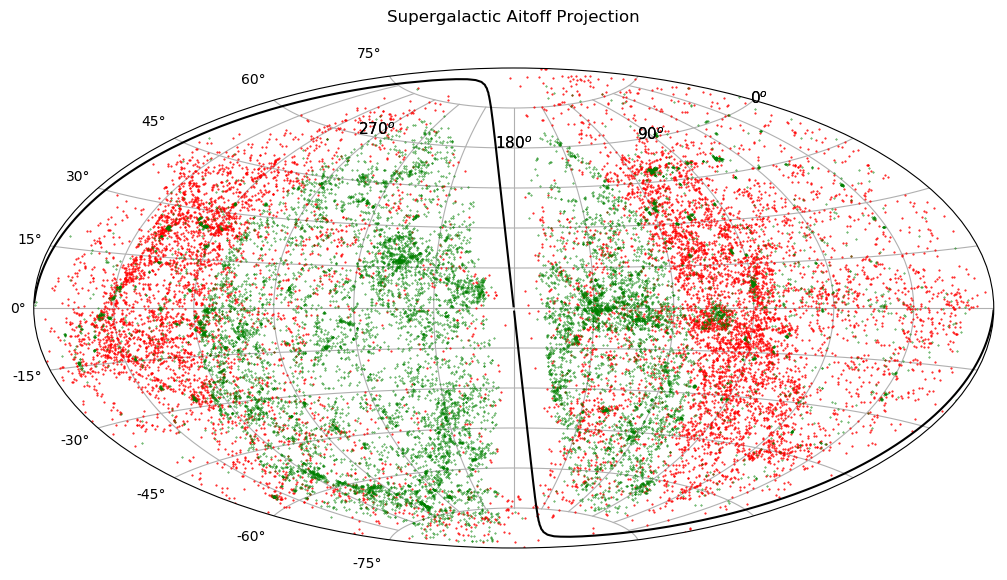

In [7]:
fig = plt.figure(figsize=(13, 8), dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
plt.title("Supergalactic Aitoff Projection", y=1.08)
ax.grid(True)
ax.set_xticklabels([])
plt.subplots_adjust(top=0.90, bottom=0.3, right=0.95, left=0.05)

ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black')


ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black') 


for i in range(len(pgc)):
    
    x, y = xymap_aitoff(sgl[i], sgb[i])
    ax.plot(x, y, '.', color='r', mec='r', ms=1)
    
for i in range(len(CF3_sgl)):
    
    x, y = xymap_aitoff(CF3_sgl[i], CF3_sgb[i])
    ax.plot(x, y, '.', color='g', mec='g', ms=0.7)


add_plane(ax, color='black', plane='galactic', projection='supergalactic')



In [8]:
inFile = '../All_LEDA_EDD.csv'
table = np.genfromtxt( inFile , delimiter=',', filling_values=None, names=True, dtype=None)
pgc_leda    = table['pgc']
ra_leda     = table['al2000']*15.
dec_leda     = table['de2000']


CF3 = np.genfromtxt('../CF3.csv' , delimiter=',', filling_values="-100000", names=True, dtype=None )
CF3_pgc = CF3['PGC']  # CF2D


ibx = np.isin(pgc_leda, CF3_pgc)
ra_leda = ra_leda[ibx]
dec_leda = dec_leda[ibx]
pgc_leda = pgc_leda[ibx]


ibx = np.logical_not(np.isin(pgc_leda, pgc))
ra_leda = ra_leda[ibx]
dec_leda = dec_leda[ibx]

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [9]:
len(ra_leda)

13083

j2000
j2000
j2000
j2000
j2000
j2000
j2000
j2000


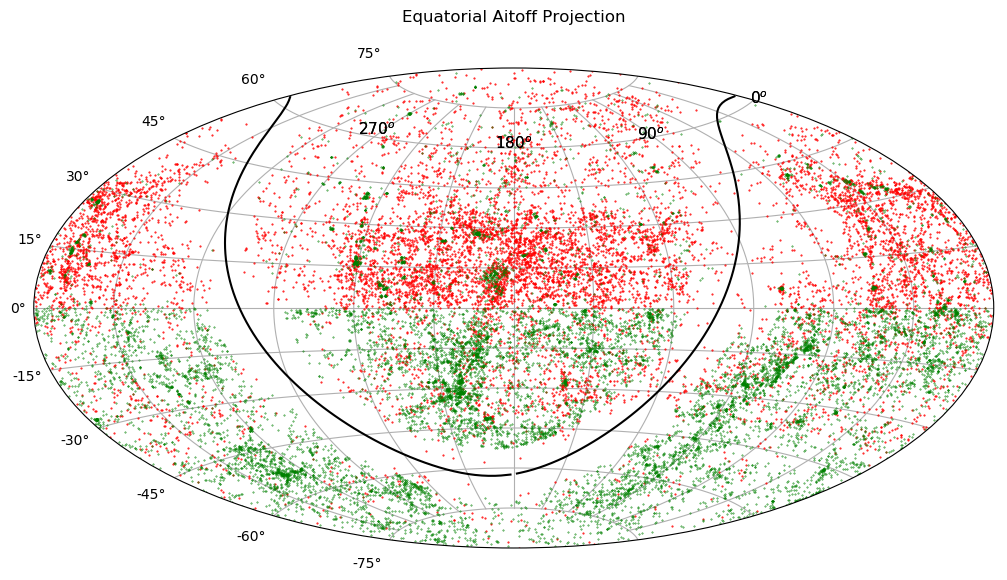

In [10]:
fig = plt.figure(figsize=(13, 8), dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
plt.title("Equatorial Aitoff Projection", y=1.08)
ax.grid(True)
ax.set_xticklabels([])
plt.subplots_adjust(top=0.90, bottom=0.3, right=0.95, left=0.05)

ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black')


ax.annotate(r'$0^o$', (pi-0.1,pi/3.), size=11, color='black')
ax.annotate(r'$90^o$', (pi/2.-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$180^o$', (-0.2,pi/3.), size=11, color='black')
ax.annotate(r'$270^o$', (-pi/2.-0.2,pi/3.), size=11, color='black') 


for i in range(len(pgc)):
    
    x, y = xymap_aitoff(ra[i], dec[i])
    ax.plot(x, y, '.', color='r', mec='r', ms=1)
    
for i in range(len(ra_leda)):
    
    x, y = xymap_aitoff(ra_leda[i], dec_leda[i])
    ax.plot(x, y, '.', color='g', mec='g', ms=0.7)


add_plane(ax, color='black', plane='galactic', projection='equatorial')

